In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
plt.style.use('ggplot')

In [2]:
my_parse = lambda x: '{:%Y-%m}'.format(datetime.strptime(x, '%m/%d/%Y'))

df = pd.read_csv('blueapron.csv', parse_dates = ['recipe_date'], date_parser = my_parse)

In [3]:
df.columns.tolist()

['cuisine',
 'ingredients',
 'num_ratings',
 'prep_time',
 'rating',
 'recipe_date',
 'recipe_name',
 'vegetarian']

In [4]:
df.head()

,cuisine,ingredients,num_ratings,prep_time,rating,recipe_date,recipe_name,vegetarian
0,Mexican,"Pork Roast,Diced Butternut Squash,Red Onion,Br...",1,40 MIN,0.00,2020-06-01,Sheet Pan Chipotle Pork Roast with Butternut S...,No
1,Japanese,"Tail-On Shrimp (Peeled & Deveined),Sweet White...",5289,35 MIN,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No
2,Asian,"Firm Tofu,Brown Rice,Navel Orange,Carrots,Brus...",1115,40 MIN,4.23,2020-09-01,"Orange & Soy-Glazed Tofu with Brown Rice, Vege...",Yes
3,Italian,"Fettuccine Pasta,Zucchini,Garlic,Basil Pesto,G...",2551,20 MIN,4.32,2020-09-01,Pesto Fettuccine with Zucchini & Grana Padano ...,Yes
4,Italian,"Boneless Skinless Chicken Breasts,Orzo Pasta,G...",4504,35 MIN,4.50,2020-09-01,Garlic-Caper Chicken with Creamy Calabrian Zuc...,No


In [5]:
df.cuisine.value_counts()

American            576
Italian             493
Mexican             274
Asian               260
Middle Eastern      111
Indian              104
Mediterranean       104
Chinese             100
French               95
Japanese             78
Southern             78
Thai                 45
Greek                35
Korean               32
Spanish              31
Vietnamese           17
Cajun Creole         16
Latin American       14
Moroccan             14
Caribbean             9
British               5
German                4
Egyptian              4
African               2
Eastern European      1
Name: cuisine, dtype: int64

In [6]:
df.prep_time.value_counts()

30 MIN     466
40 MIN     398
35 MIN     386
25 MIN     304
45 MIN     227
20 MIN     167
50 MIN     132
55 MIN      93
95 MIN      74
60 MIN      13
130 MIN      1
200 MIN      1
Name: prep_time, dtype: int64

In [7]:
#Data cleaning steps ,  prep time amounts with < 10 recipes.

# Remove cuisine types with < 10 recipes
cuisine_list = df.cuisine.value_counts()[df.cuisine.value_counts() >= 10].index
filtered_df = df.loc[df.cuisine.isin(cuisine_list)]

#Convert prep times from str to float
filtered_df.prep_time.replace(" MIN", "", regex = True, inplace = True)
filtered_df = filtered_df.loc[~filtered_df.prep_time.isna()]
filtered_df.prep_time = filtered_df.prep_time.astype(float)

prep_list = filtered_df.prep_time.value_counts()[filtered_df.prep_time.value_counts() >= 10].index
filtered_df = filtered_df.loc[filtered_df.prep_time.isin(prep_list)]

#Removed recipes with < 25 reviews
filtered_df = filtered_df[filtered_df.num_ratings >= 25]

#Convert recipe dates to datetime format
# lst = []
# for x in filtered_df.recipe_date:
#     dt = '{:%Y-%m}'.format(datetime.strptime(x, '%m/%d/%Y'))
#     dt2 = datetime.strptime(dt, '%Y-&m')
#     lst.append(dt2)
# filtered_df.recipe_date = lst
# filtered_df.recipe_date = pd.to_datetime(filtered_df.recipe_date)

C:\Users\amd-pc\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [8]:
filtered_df.recipe_date

1      2020-11-01
2      2020-09-01
3      2020-09-01
4      2020-09-01
5      2020-09-01
          ...    
2490   2020-10-01
2491   2020-10-01
2492   2020-10-01
2493   2020-10-01
2494   2020-09-01
Name: recipe_date, Length: 2095, dtype: datetime64[ns]

In [9]:
filtered_df.cuisine.value_counts()

American          503
Italian           419
Mexican           232
Asian             205
Middle Eastern    104
Mediterranean      87
Indian             85
Chinese            83
Japanese           70
Southern           63
French             61
Thai               44
Greek              34
Korean             30
Spanish            26
Cajun Creole       14
Vietnamese         13
Latin American     11
Moroccan           11
Name: cuisine, dtype: int64

In [10]:
filtered_df.prep_time.value_counts()

30.0    440
40.0    378
35.0    357
25.0    278
45.0    217
20.0    161
50.0    129
55.0     89
95.0     34
60.0     12
Name: prep_time, dtype: int64

In [11]:
filtered_df.head()

,cuisine,ingredients,num_ratings,prep_time,rating,recipe_date,recipe_name,vegetarian
1,Japanese,"Tail-On Shrimp (Peeled & Deveined),Sweet White...",5289,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No
2,Asian,"Firm Tofu,Brown Rice,Navel Orange,Carrots,Brus...",1115,40.0,4.23,2020-09-01,"Orange & Soy-Glazed Tofu with Brown Rice, Vege...",Yes
3,Italian,"Fettuccine Pasta,Zucchini,Garlic,Basil Pesto,G...",2551,20.0,4.32,2020-09-01,Pesto Fettuccine with Zucchini & Grana Padano ...,Yes
4,Italian,"Boneless Skinless Chicken Breasts,Orzo Pasta,G...",4504,35.0,4.50,2020-09-01,Garlic-Caper Chicken with Creamy Calabrian Zuc...,No
5,Mexican,"15.5-Oz Can Black Beans,Flour Tortillas,Lime,L...",1606,35.0,4.34,2020-09-01,Black Bean & Caramelized Onion Tacos with Roas...,Yes


In [12]:
filtered_df.describe()

,num_ratings,prep_time,rating
count,2095.000000,2095.000000,2095.000000
mean,6114.102148,36.298329,4.068931
std,6218.501602,11.912779,0.265095
min,26.000000,20.000000,2.600000
25%,1918.000000,30.000000,3.920000
50%,4076.000000,35.000000,4.110000
75%,7529.000000,40.000000,4.265000
max,33931.000000,95.000000,4.730000


In [13]:
filtered_df.dtypes

cuisine                object
ingredients            object
num_ratings             int64
prep_time             float64
rating                float64
recipe_date    datetime64[ns]
recipe_name            object
vegetarian             object
dtype: object

### Exploratory viz's

Text(0.5, 1.0, 'Distribution of recipe ratings')

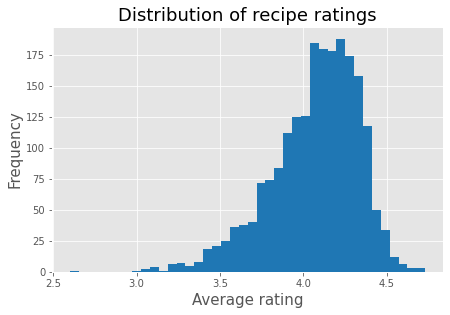

In [14]:
plt.figure(figsize = (7, 4.5))
plt.hist(filtered_df['rating'], bins = 40, color='tab:blue')
plt.xlabel('Average rating', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of recipe ratings', fontsize = 18)

Text(0.5, 1.0, 'Distribution of # of ratings')

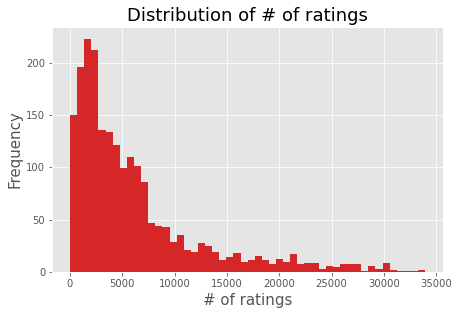

In [15]:
plt.figure(figsize = (7, 4.5))
plt.hist(filtered_df['num_ratings'], bins = 50, color='tab:red')
plt.xlabel('# of ratings', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of # of ratings', fontsize = 18)

Text(0.5, 1.0, 'Average rating vs # of ratings')

<Figure size 504x324 with 0 Axes>

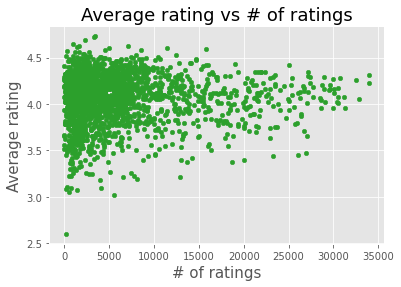

In [16]:
plt.figure(figsize = (7, 4.5))
filtered_df.plot.scatter('num_ratings', 'rating', color = 'tab:green')

plt.xlabel('# of ratings', fontsize = 15)
plt.ylabel('Average rating', fontsize = 15)
plt.title('Average rating vs # of ratings', fontsize = 18)

### Analyzing by cuisine type

Text(0.5, 1.0, 'Average recipe rating by cuisine')

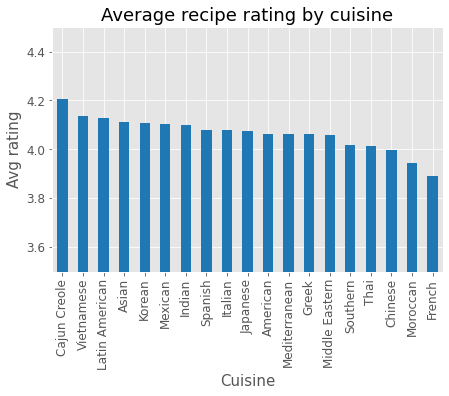

In [17]:
plt.figure(figsize = (7, 4.5))
filtered_df.groupby('cuisine')['rating'].mean().sort_values(ascending = False).plot.bar(color='tab:blue')

plt.xlabel('Cuisine', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylim(3.5,4.5)
plt.title('Average recipe rating by cuisine', fontsize = 18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

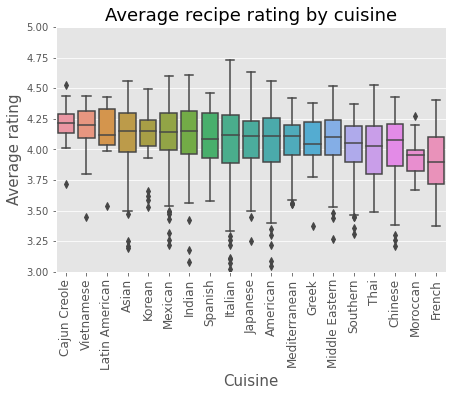

In [18]:
plt.figure(figsize = (7, 4.5))
sns.boxplot(x = 'cuisine', y = 'rating', data = filtered_df, order = ['Cajun Creole', 'Vietnamese', 'Latin American', 'Asian', 'Korean', 'Mexican', 'Indian', 'Spanish', 'Italian', 'Japanese', 'American', 'Mediterranean', 'Greek', 'Middle Eastern', 'Southern', 'Thai', 'Chinese', 'Moroccan', 'French'])
plt.xlabel('Cuisine', fontsize = 15)
plt.ylabel('Average rating', fontsize = 15)
plt.ylim(3,5)
plt.title('Average recipe rating by cuisine', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 12)


Text(0.5, 1.0, 'Average # of ratings by cuisine')

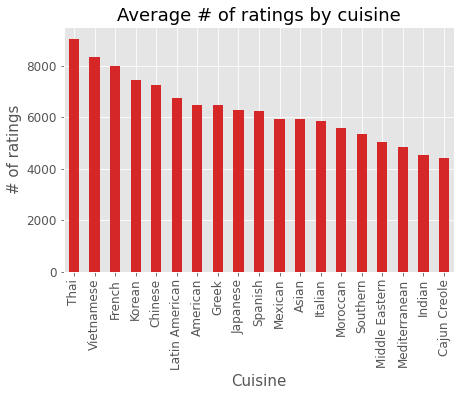

In [19]:
plt.figure(figsize = (7, 4.5))
filtered_df.groupby('cuisine')['num_ratings'].mean().sort_values(ascending = False).plot.bar(color='tab:red')

plt.xlabel('Cuisine', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.ylabel('# of ratings', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average # of ratings by cuisine', fontsize = 18)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text major ticklabel objects>)

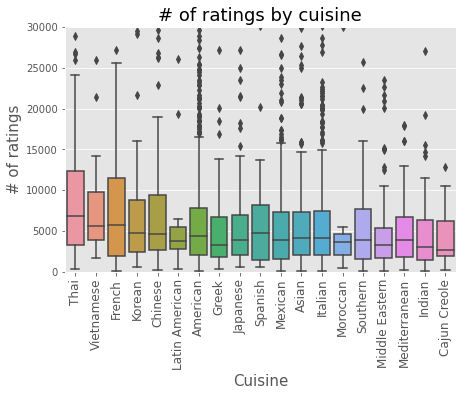

In [20]:
plt.figure(figsize = (7, 4.5))
sns.boxplot(x = 'cuisine', y = 'num_ratings', data = filtered_df, order = ['Thai', 'Vietnamese', 'French', 'Korean', 'Chinese', 'Latin American', 'American', 'Greek', 'Japanese', 'Spanish', 'Mexican', 'Asian', 'Italian', 'Moroccan', 'Southern', 'Middle Eastern', 'Mediterranean', 'Indian', 'Cajun Creole'])
plt.xlabel('Cuisine', fontsize = 15)
plt.ylabel('# of ratings', fontsize = 15)
plt.ylim(0,30000)
plt.title('# of ratings by cuisine', fontsize = 18)
plt.xticks(rotation = 90, fontsize = 12)

### Analyzing by prep time

Text(0.5, 1.0, 'Average recipe rating by prep time')

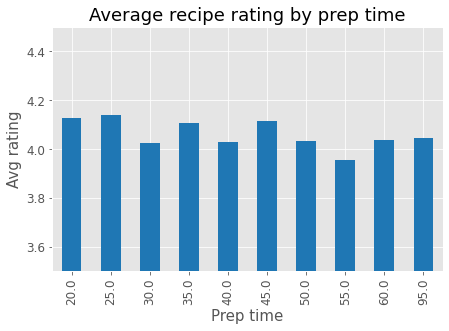

In [21]:
plt.figure(figsize = (7, 4.5))
filtered_df.groupby('prep_time')['rating'].mean().plot.bar(color='tab:blue')

plt.xlabel('Prep time', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylim(3.5,4.5)
plt.title('Average recipe rating by prep time', fontsize = 18)

Text(0.5, 1.0, 'Average recipe rating by prep time')

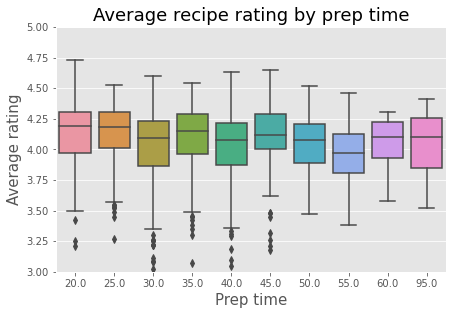

In [22]:
plt.figure(figsize = (7, 4.5))
sns.boxplot(x = 'prep_time', y = 'rating', data = filtered_df)
plt.xlabel('Prep time', fontsize = 15)
plt.ylabel('Average rating', fontsize = 15)
plt.ylim(3,5)
plt.title('Average recipe rating by prep time', fontsize = 18)

Text(0.5, 1.0, 'Average # of ratings by prep time')

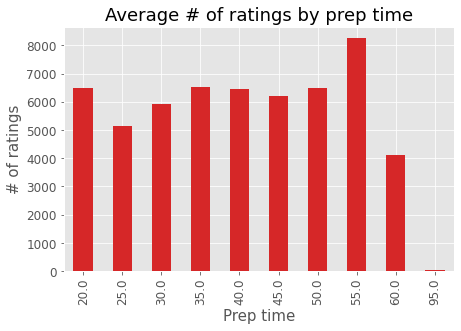

In [23]:
plt.figure(figsize = (7, 4.5))
filtered_df.groupby('prep_time')['num_ratings'].mean().plot.bar(color='tab:red')

plt.xlabel('Prep time', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.ylabel('# of ratings', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average # of ratings by prep time', fontsize = 18)

Text(0.5, 1.0, '# of ratings by prep time')

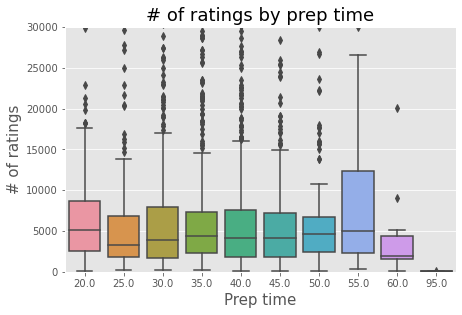

In [24]:
plt.figure(figsize = (7, 4.5))
sns.boxplot(x = 'prep_time', y = 'num_ratings', data = filtered_df)
plt.xlabel('Prep time', fontsize = 15)
plt.ylabel('# of ratings', fontsize = 15)
plt.ylim(0,30000)
plt.title('# of ratings by prep time', fontsize = 18)

### Analyzing by ingredients

In [25]:
# df_ratings = filtered_df[['num_ratings', 'rating', 'prep_time']]
# df_ratings.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)

In [26]:
filtered_df.ingredients

1       Tail-On Shrimp (Peeled & Deveined),Sweet White...
2       Firm Tofu,Brown Rice,Navel Orange,Carrots,Brus...
3       Fettuccine Pasta,Zucchini,Garlic,Basil Pesto,G...
4       Boneless Skinless Chicken Breasts,Orzo Pasta,G...
5       15.5-Oz Can Black Beans,Flour Tortillas,Lime,L...
                              ...                        
2490    Steaks,Mushrooms,Golden Potatoes,Garlic,Kale,B...
2491    Ground Turkey,Tomatillo-Poblano Sauce,Shredded...
2492    Flour Tortillas,Red Quinoa,15.5-Oz Can Black B...
2493    Tilapia Fillets,Brown Rice,Scallions,Lemongras...
2494    Pasture-Raised Eggs,Red Rice Blend,Mushrooms,K...
Name: ingredients, Length: 2095, dtype: object

In [27]:
df_ing = filtered_df.copy()
df_ing = df_ing[~df_ing.ingredients.isna()]
df_ing.ingredients = df_ing.ingredients.apply(lambda x: x.split(","))
df_ing.ingredients

1       [Tail-On Shrimp (Peeled & Deveined), Sweet Whi...
2       [Firm Tofu, Brown Rice, Navel Orange, Carrots,...
3       [Fettuccine Pasta, Zucchini, Garlic, Basil Pes...
4       [Boneless Skinless Chicken Breasts, Orzo Pasta...
5       [15.5-Oz Can Black Beans, Flour Tortillas, Lim...
                              ...                        
2490    [Steaks, Mushrooms, Golden Potatoes, Garlic, K...
2491    [Ground Turkey, Tomatillo-Poblano Sauce, Shred...
2492    [Flour Tortillas, Red Quinoa, 15.5-Oz Can Blac...
2493    [Tilapia Fillets, Brown Rice, Scallions, Lemon...
2494    [Pasture-Raised Eggs, Red Rice Blend, Mushroom...
Name: ingredients, Length: 1972, dtype: object

In [28]:
index = 1
lst = []
for item in df_ing.ingredients:
    lst.extend(map(lambda x: [index, x], item))
    index = index + 1
ing_list = pd.DataFrame(lst, columns = ['index', 'ingredients'])
ing_list

,index,ingredients
0,1,Tail-On Shrimp (Peeled & Deveined)
1,1,Sweet White Miso Paste
2,1,Baby Bok Choy
3,1,Butter
4,1,Mushrooms
...,...,...
13832,1972,Piece Ginger
13833,1972,Rice Vinegar
13834,1972,Black & White Sesame Seeds
13835,1972,Honey


In [29]:
df_ing = pd.merge(df_ing.drop('ingredients', axis = 1), ing_list, how = 'right', left_index = True, right_on = 'index')
df_ing

,cuisine,num_ratings,prep_time,rating,recipe_date,recipe_name,vegetarian,index,ingredients
0,Japanese,5289.0,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No,1,Tail-On Shrimp (Peeled & Deveined)
1,Japanese,5289.0,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No,1,Sweet White Miso Paste
2,Japanese,5289.0,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No,1,Baby Bok Choy
3,Japanese,5289.0,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No,1,Butter
4,Japanese,5289.0,35.0,4.24,2020-11-01,Miso-Butter Shrimp with Stir-Fried Vegetables,No,1,Mushrooms
...,...,...,...,...,...,...,...,...,...
13832,Italian,1255.0,25.0,4.31,2019-08-01,Hot Italian Pork Sausage & Brussels Sprouts wi...,No,1972,Piece Ginger
13833,Italian,1255.0,25.0,4.31,2019-08-01,Hot Italian Pork Sausage & Brussels Sprouts wi...,No,1972,Rice Vinegar
13834,Italian,1255.0,25.0,4.31,2019-08-01,Hot Italian Pork Sausage & Brussels Sprouts wi...,No,1972,Black & White Sesame Seeds
13835,Italian,1255.0,25.0,4.31,2019-08-01,Hot Italian Pork Sausage & Brussels Sprouts wi...,No,1972,Honey


In [30]:
ing_list = df_ing.ingredients.value_counts()[df_ing.ingredients.value_counts() >= 20].index
df_ing = df_ing.loc[df_ing.ingredients.isin(ing_list)]

In [31]:
df_ing.ingredients.value_counts()

Garlic                               511
Garlic Powder                        316
Smoked Paprika                       311
Boneless Skinless Chicken Breasts    240
Onion Powder                         228
                                    ... 
Cumin                                 20
Dried Oregano                         20
Ranch Dressing                        20
Cauliflower                           20
Chives                                20
Name: ingredients, Length: 180, dtype: int64

Text(0.5, 1.0, 'Average recipe rating by ingredient')

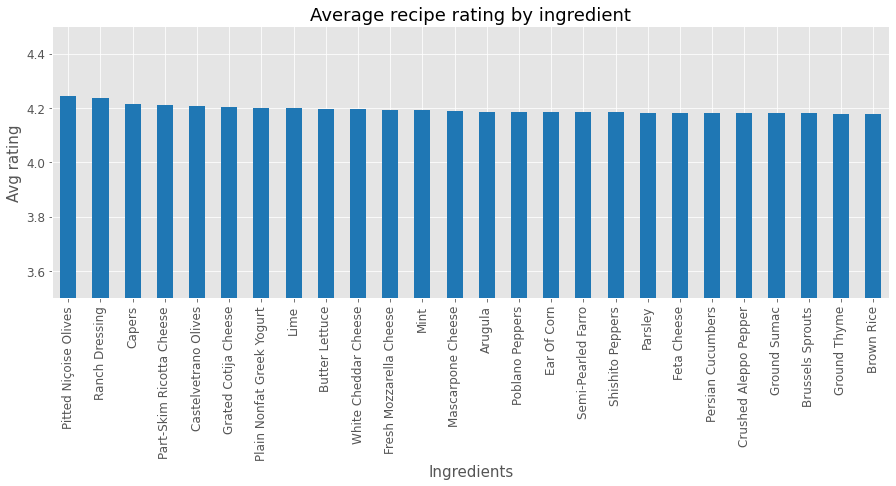

In [32]:
plt.figure(figsize = (15, 5))
df_ing.groupby('ingredients')['rating'].mean().sort_values(ascending = False).plot.bar(color='tab:blue')

plt.xlabel('Ingredients', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlim(-.5,25.5)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylim(3.5,4.5)

plt.title('Average recipe rating by ingredient', fontsize = 18)

Text(0.5, 1.0, 'Average recipe rating by ingredient')

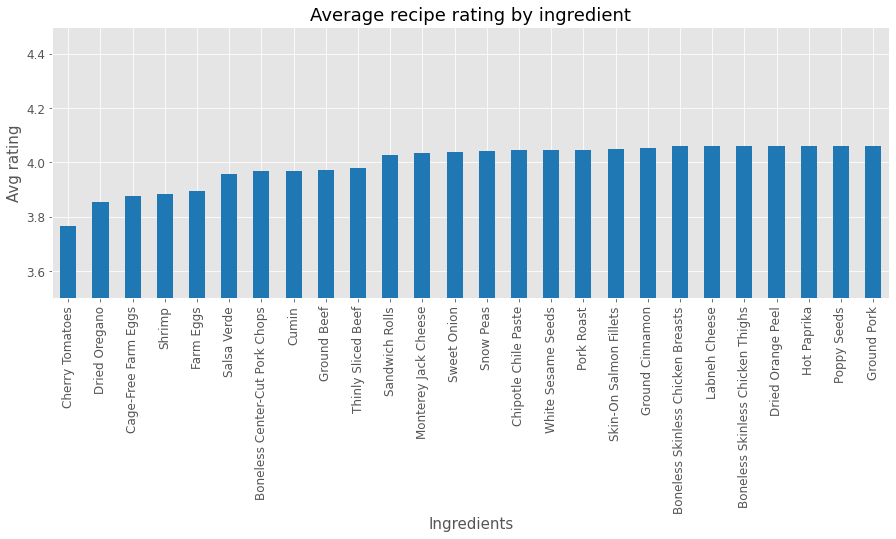

In [33]:
plt.figure(figsize = (15, 5))
df_ing.groupby('ingredients')['rating'].mean().sort_values(ascending = True).plot.bar(color='tab:blue')

plt.xlabel('Ingredients', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlim(-.5,25.5)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylim(3.5,4.5)

plt.title('Average recipe rating by ingredient', fontsize = 18)

Text(0.5, 1.0, 'Average # of ratings by ingredient')

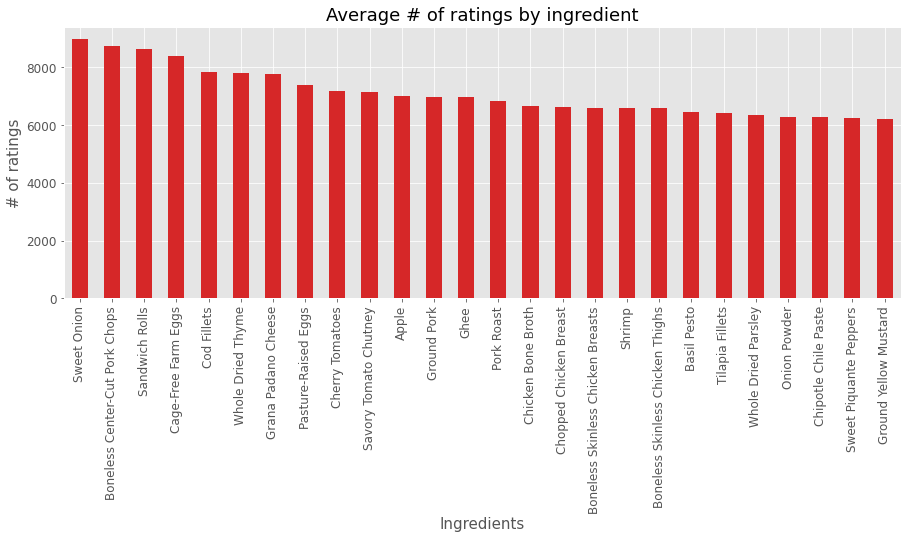

In [34]:
plt.figure(figsize = (15, 5))
df_ing.groupby('ingredients')['num_ratings'].mean().sort_values(ascending = False).plot.bar(color='tab:red')

plt.xlabel('Ingredients', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlim(-.5,25.5)
plt.ylabel('# of ratings', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average # of ratings by ingredient', fontsize = 18)

Text(0.5, 1.0, 'Average # of ratings by ingredient')

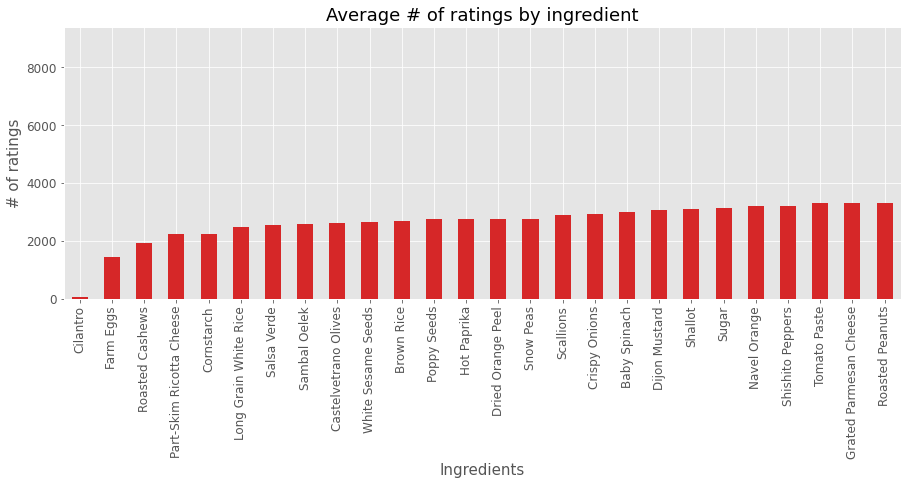

In [35]:
plt.figure(figsize = (15, 5))
df_ing.groupby('ingredients')['num_ratings'].mean().sort_values(ascending = True).plot.bar(color='tab:red')

plt.xlabel('Ingredients', fontsize = 15)
plt.xticks(rotation = 90, fontsize = 12)
plt.xlim(-.5,25.5)
plt.ylabel('# of ratings', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average # of ratings by ingredient', fontsize = 18)

Text(0.5, 1.0, 'Average recipe rating by vegetarian/non-vegetarian')

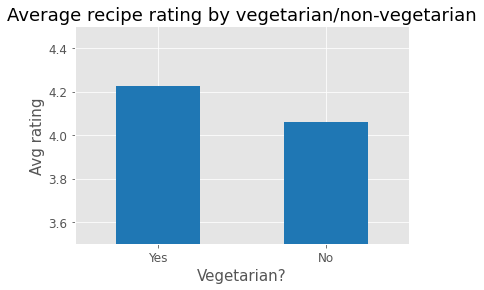

In [36]:
filtered_df.groupby('vegetarian')['rating'].mean().sort_values(ascending = False).plot.bar(color='tab:blue')

plt.xlabel('Vegetarian?', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)
plt.ylim(3.5,4.5)
plt.title('Average recipe rating by vegetarian/non-vegetarian', fontsize = 18)

Text(0.5, 1.0, 'Average # of ratings by vegetarian')

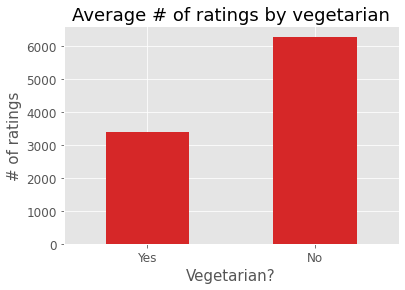

In [37]:
filtered_df.groupby('vegetarian')['num_ratings'].mean().sort_values(ascending = True).plot.bar(color='tab:red')

plt.xlabel('Vegetarian?', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('# of ratings', fontsize = 15)
plt.yticks(fontsize = 12)
plt.title('Average # of ratings by vegetarian', fontsize = 18)

Text(0.5, 1.0, 'Average recipe rating by protein type')

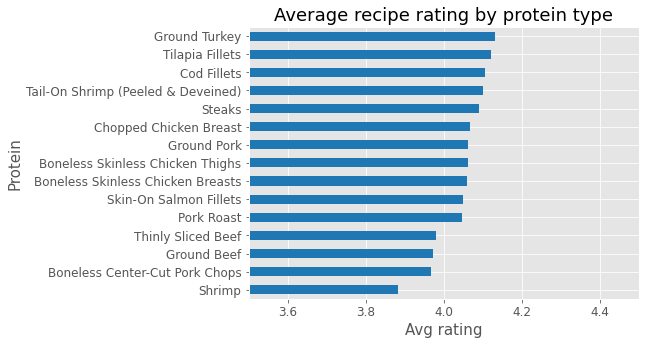

In [38]:
prot_list = ['Pork Roast', 'Boneless Center-Cut Pork Chops', 'Steaks', 'Flank Steak', 'Thinly Sliced Beef', 'Chopped Chicken Breast', 'Boneless Skinless Chicken Thighs', 'Boneless Skinless Chicken Breasts', 'Ground Turkey', 'Ground Beef', 'Ground Pork', 'Ground Chicken', 'Ground Lamb', 'Shrimp', 'Tail-On Shrimp (Peeled & Deveined)', 'Cod Fillets', 'Tilapia Fillets', 'Skin-On Salmon Fillets', 'Skin-On Barramundi Fillets', 'Prosciutto', 'Hot Italian Pork Sausage']
df_prot = df_ing.loc[df_ing.ingredients.isin(prot_list)]

plt.figure(figsize = (7, 5))
df_prot.groupby('ingredients')['rating'].mean().sort_values(ascending = True).plot.barh(color='tab:blue')
plt.xlabel('Avg rating', fontsize = 15)
plt.xticks(fontsize = 12)
plt.ylabel('Protein', fontsize = 15)
plt.yticks(fontsize = 12)
plt.xlim(3.5,4.5)

plt.title('Average recipe rating by protein type', fontsize = 18)

In [39]:
df_prot.ingredients.value_counts()

Boneless Skinless Chicken Breasts     240
Chopped Chicken Breast                158
Ground Beef                           132
Boneless Skinless Chicken Thighs       71
Steaks                                 67
Boneless Center-Cut Pork Chops         63
Thinly Sliced Beef                     62
Tilapia Fillets                        57
Ground Pork                            54
Skin-On Salmon Fillets                 53
Tail-On Shrimp (Peeled & Deveined)     50
Pork Roast                             49
Shrimp                                 45
Cod Fillets                            39
Ground Turkey                          24
Name: ingredients, dtype: int64

### Analyzing customer trends over time

Text(0.5, 1.0, 'Distribution of recipes by date')

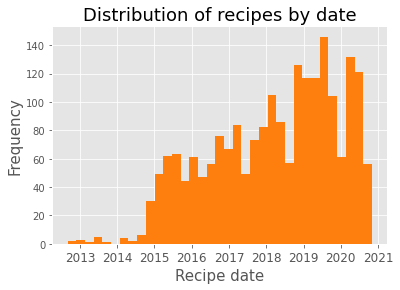

In [50]:
# sns.distplot(filtered_df['recipe_date'], bins = 30, color='tab:orange')
plt.hist(filtered_df['recipe_date'], bins = 35, color='tab:orange')
plt.xlabel('Recipe date', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Frequency', fontsize = 15)
plt.title('Distribution of recipes by date', fontsize = 18)

Text(0.5, 1.0, 'Average recipe rating over time')

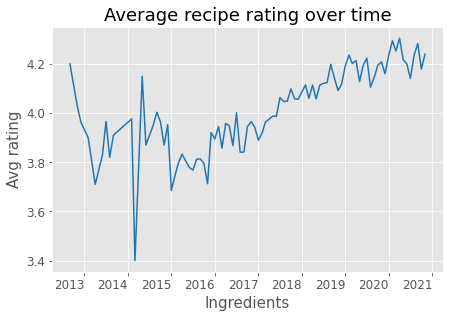

In [44]:
plt.figure(figsize = (7, 5))
filtered_df.groupby('recipe_date')['rating'].mean().plot(color='tab:blue')

plt.xlabel('Year', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Avg rating', fontsize = 15)
plt.yticks(fontsize = 12)

plt.title('Average recipe rating over time', fontsize = 18)

Text(0.5, 1.0, 'Average # of ratings per recipe over time')

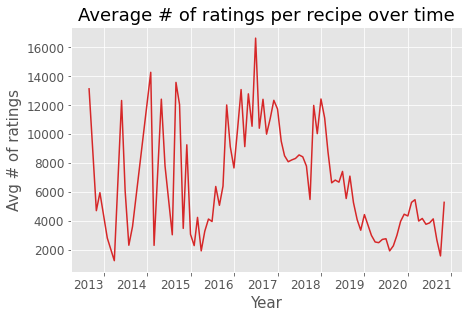

In [46]:
plt.figure(figsize = (7, 5))
filtered_df.groupby('recipe_date')['num_ratings'].mean().plot(color='tab:red')

plt.xlabel('Year', fontsize = 15)
plt.xticks(rotation = 0, fontsize = 12)
plt.ylabel('Avg # of ratings', fontsize = 15)
plt.yticks(fontsize = 12)

plt.title('Average # of ratings per recipe over time', fontsize = 18)